## Install Dependencies

In [2]:
!pip install openai


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Import Libraries

In [2]:
import openai, os, base64, requests
from PIL import Image

## Image based completion - URL

In [3]:
messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Briefly explain the contents of this image?"},
                {
                    "type": "image_url",
                    "image_url": "https://i.pinimg.com/736x/39/85/bb/3985bb5e2cde99a6958145b43bb7f5b2.jpg",
                },
            ],
        }
    ]

response = openai.ChatCompletion.create(
    model='gpt-4-vision-preview',
    messages=messages,
    temperature=0,
    max_tokens=100,
)

In [4]:
response

<OpenAIObject chat.completion id=chatcmpl-8IzPiKLloaWJtq7zWRY524NHZBD88 at 0x1073b5910> JSON: {
  "id": "chatcmpl-8IzPiKLloaWJtq7zWRY524NHZBD88",
  "object": "chat.completion",
  "created": 1699536670,
  "model": "gpt-4-1106-vision-preview",
  "usage": {
    "prompt_tokens": 441,
    "completion_tokens": 77,
    "total_tokens": 518
  },
  "choices": [
    {
      "message": {
        "role": "assistant",
        "content": "The image shows a man standing in a park with a dog, likely a Golden Retriever, on a leash. The man is looking at his smartphone and smiling, while the dog sits beside him, looking content. The setting is outdoors with trees and grass, and the sunlight suggests it might be late afternoon or early evening. The overall atmosphere of the image is pleasant and relaxed."
      },
      "finish_details": {
        "type": "stop",
        "stop": "<|fim_suffix|>"
      },
      "index": 0
    }
  ]
}

In [5]:
print(response["choices"][0]["message"])

{
  "role": "assistant",
  "content": "The image shows a man standing in a park with a dog, likely a Golden Retriever, on a leash. The man is looking at his smartphone and smiling, while the dog sits beside him, looking content. The setting is outdoors with trees and grass, and the sunlight suggests it might be late afternoon or early evening. The overall atmosphere of the image is pleasant and relaxed."
}


In [6]:
messages.append(response["choices"][0]["message"])

In [7]:
messages.append({
            "role": "user",
            "content": [
                {"type": "text", "text": "Why do you think that's the breed?"},
            ],
        })

In [8]:
response = openai.ChatCompletion.create(
    model='gpt-4-vision-preview',
    messages=messages,
    temperature=0,
    max_tokens=200,
)

In [9]:
print(response["choices"][0]["message"])

{
  "role": "assistant",
  "content": "I suggested that the dog might be a Golden Retriever based on several visible characteristics that are typical of the breed:\n\n1. Coat Color: The dog has a cream to golden-colored coat, which is a hallmark of the Golden Retriever breed.\n2. Coat Texture: The fur appears to be dense and water-repellent, another characteristic of Golden Retrievers.\n3. Body Size and Shape: The dog has a sturdy, muscular build with a broad head and strong neck, which fits the general physical profile of a Golden Retriever.\n4. Ears: The ears are floppy and set just above eye level, which is consistent with the breed's traits.\n5. Friendly Demeanor: The dog appears to be relaxed and happy, which aligns with the Golden Retriever's reputation for being friendly and good-natured.\n\nThese features are common in Golden Retrievers, making it a reasonable guess based on the visual information provided. However, without a clearer view or"
}


## Image based completion - image uploads

In [10]:
api_key = os.environ.get("OPENAI_API_KEY")
image_path = "data/young-woman-sitting-laptop.jpeg"

In [11]:
# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [12]:
# Read and encode the image
base64_image = encode_image(image_path)

# Setup headers and payload
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "What’s in this image?"
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 400
}

In [13]:
# Make a post request
response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

In [15]:
response.json()

{'id': 'chatcmpl-8IzVUgr2mk91WtWjNFEPYgurAeWic',
 'object': 'chat.completion',
 'created': 1699537028,
 'model': 'gpt-4-1106-vision-preview',
 'usage': {'prompt_tokens': 778,
  'completion_tokens': 139,
  'total_tokens': 917},
 'choices': [{'message': {'role': 'assistant',
    'content': "This is an illustrated image featuring a casually dressed woman sitting in a comfortable chair with her legs crossed. She is smiling and using a laptop that's resting on her lap. She's wearing a white t-shirt, white pants, and white sneakers with some gray and pink accents. Her hair is styled in loose, wavy curls.\n\nThe background contains abstract, neon-like line art that suggests shapes of buildings and other structures, hinting at a stylized cityscape. The artwork employs a mix of vibrant colors against a darker backdrop, which contributes to the digital or cyber-themed aesthetic of the scene. The entire image has a modern, youthful vibe often associated with creative, tech-savvy individuals."},
 

## Image Completions - multiple images & sources

In [16]:
image_paths = ["data/young-woman-sitting-laptop.jpeg", "data/robot-sitting-laptop.jpeg"]
image_url = "https://images.unsplash.com/photo-1622554129902-bb01970e2540?q=80&w=3560&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

In [17]:
# Read and encode the image
base64_image_1 = encode_image(image_paths[0])
base64_image_2 = encode_image(image_paths[1])

messages = [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "What’s the difference between these images?"
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image_1}"
            }
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image_2}"
            }
          },
          {
            "type": "image_url",
            "image_url": {
              "url": image_url
            }
          },
        ]
      }
    ]

payload = {
    "model": "gpt-4-vision-preview",
    "messages": messages,
    "max_tokens": 400
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

In [19]:
print(response.json()["choices"][0]["message"]["content"])

The differences between these images are primarily in their subjects and artistic styles:

1. The first image features an illustrated human character, a female with stylized features, sitting on a lounge chair using a laptop. The artwork is vibrant and has a neon color palette with a stylized, cyber-themed background.

2. The second image also features a stylized illustration, but this time the character is a humanoid robot. The robot is seated in a similar pose to the human in the first image, also using a laptop on a lounge chair. The color palette is more monochromatic with purple and violet tones, and the background has technical drawings that complement the robotic theme.

3. The third image is a photograph of a real person, a male, working on a laptop. He is sitting at a table in a more informal setting compared to the stylized backgrounds of the illustrations and is wearing a face mask, which suggests the photo may have been taken during a period where health precautions were ad

## Interact with DALL-E 3

In [20]:
messages.append(response.json()["choices"][0]["message"])

In [21]:
messages.append({
    "role": "user",
    "content": [
        {"type": "text", "text": "You create prompts for image generation tools like DALL-E 3. Give me a single prompt required to make the third image into the artistic style of the others from scratch. Make sure you're highly descriptive so that it's as close as possible."},
    ],
})

In [22]:
response = openai.ChatCompletion.create(
    model='gpt-4-vision-preview',
    messages=messages,
    temperature=0,
    max_tokens=500,
)

In [23]:
print(response["choices"][0]["message"]["content"])

"Create an image of a young African American male with short curly hair, wearing a black t-shirt and a light blue surgical face mask, sitting at a blue plastic table. He is working on a black laptop with video editing software on the screen, and there are a red external hard drive and a smartphone on the table. He is wearing white earphones and is resting his chin on his hand, looking thoughtfully at the laptop screen. The setting is a simple, brightly lit room with white walls. Transform this scene into a stylized digital illustration with a cyberpunk aesthetic, featuring vibrant neon colors and geometric shapes in the background. The character should have a smooth, vector art appearance with clean lines and a dynamic pose that conveys focus and creativity. The overall tone should be futuristic and energetic, with a color palette that includes shades of purple, blue, and pink, and the background should hint at a digital matrix or abstract technological interface."


In [24]:
response = openai.Image.create(
    model="dall-e-3",
    prompt=response["choices"][0]["message"]["content"],
    n=1
)

In [25]:
response

<OpenAIObject at 0x10718d310> JSON: {
  "created": 1699537913,
  "data": [
    {
      "revised_prompt": "Create an image of a young African American male with short curly hair, wearing a black t-shirt and a light blue surgical face mask, sitting at a blue plastic table. He is working on a black laptop with video editing software on the screen, and there are a red external hard drive and a smartphone on the table. He is wearing white earphones and is resting his chin on his hand, looking thoughtfully at the laptop screen. The setting is a simple, brightly lit room with white walls. Transform this scene into a stylized digital illustration with a cyberpunk aesthetic, featuring vibrant neon colors and geometric shapes in the background. The character should have a smooth, vector art appearance with clean lines and a dynamic pose that conveys focus and creativity. The overall tone should be futuristic and energetic, with a color palette that includes shades of purple, blue, and pink, and 

In [26]:
file_path = "data/dalle3_neon_man.png"
url = response["data"][0]["url"]
generated_image = requests.get(url, headers).content  

In [27]:
with open(file_path, "wb") as image_file:
    image_file.write(generated_image)

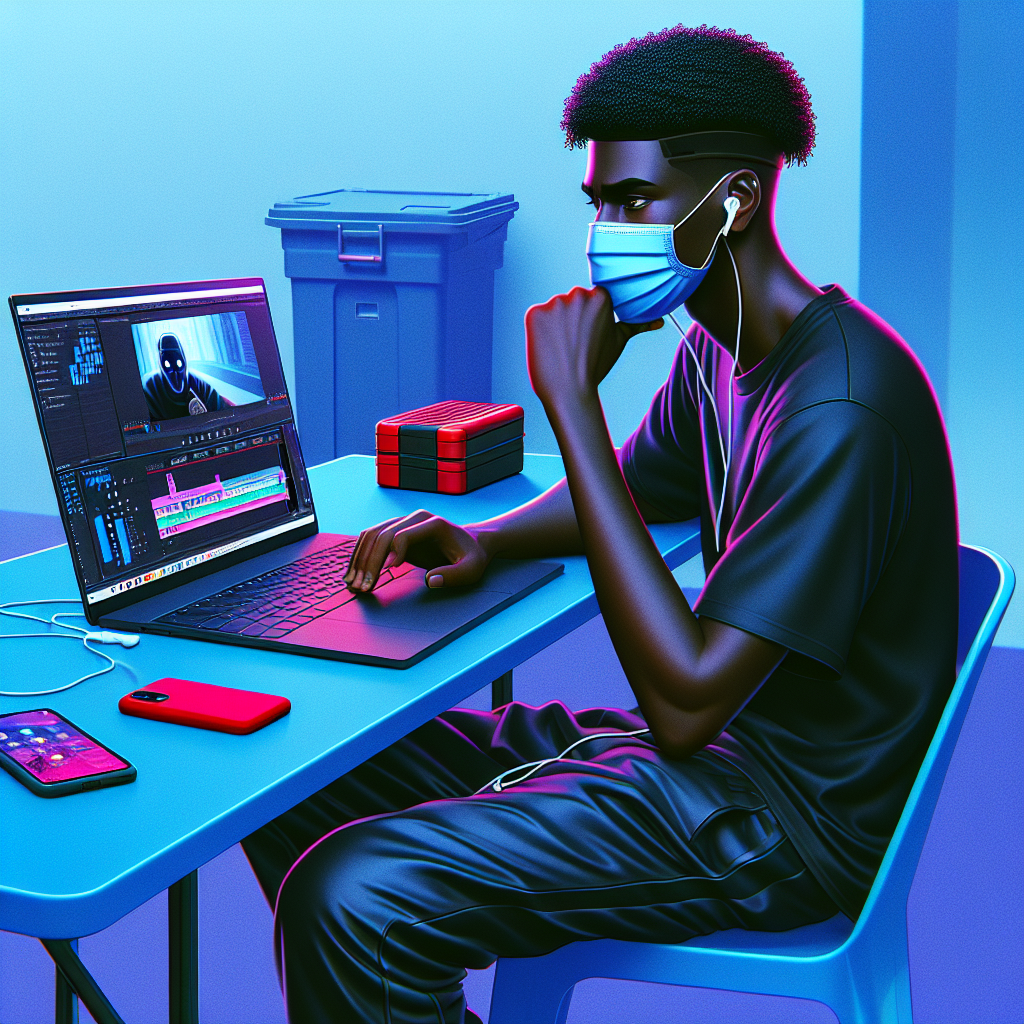

In [28]:
display(Image.open(file_path))